In [56]:
import os
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
import datetime
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
%matplotlib inline  

# Part 1 - Loading Data
## Loading Sectors associated with Stock Symbols

In [33]:
st_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies',)# reading simbols and section
st_frame = st_data[0]
st_frame.head()

,Security,Symbol,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added[3][4],CIK,Founded
0,3M Company,MMM,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740,1902
1,Abbott Laboratories,ABT,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,AbbVie Inc.,ABBV,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABIOMED Inc,ABMD,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,Accenture plc,ACN,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [34]:
dmap = dict(zip(st_frame["Symbol"], st_frame["GICS Sector"]))# a dictionary with Symbol as key and Company name as value
dmapf = dict(zip(st_frame["Symbol"], st_frame["Security"]))# a dictionary with Symbol as key and Sector as value

# Loading data downloaded from Kaggle

In [40]:
fileDir =r"D:\OneDrive - Schlumberger\python\Udacity2-2\1\project\data\stocks\\"
stocks_all = []
added_stoc_num=0
for num, filename in enumerate(os.listdir(fileDir)):#reading all the files
    statinfo = os.stat(fileDir+filename)
    if statinfo.st_size != 0:#skipping 0 size files
        if filename.split('.us')[0].upper() in dmap.keys():#reading the files that we have sector for
            # print(statinfo.st_size)
            data = pd.read_csv(fileDir + filename, header=0)
            data['name'] = filename.split('.us')[0].upper()
            if data.shape[0]>974: #data that exists fully after 2014
                data_added=data.tail(974)
                stocks_all.append(data_added)
                added_stoc_num+=1


In [42]:
allStocks = pd.concat(stocks_all)
allStocks.head()

,Date,Open,High,Low,Close,Volume,OpenInt,name
3547,2014-01-02,39.330,39.330,38.676,38.717,2781824,0,A
3548,2014-01-03,38.842,39.506,38.752,39.207,2709950,0,A
3549,2014-01-06,39.538,39.744,38.960,39.013,2580480,0,A
3550,2014-01-07,39.227,39.695,39.215,39.573,2124242,0,A
3551,2014-01-08,39.491,40.323,39.378,40.220,3860935,0,A


In [46]:
allStocks['sector'] = allStocks['name'].apply(lambda x: x.upper()).map(dmap)
allStocks['company'] = allStocks['name'].apply(lambda x: x.upper()).map(dmapf)
allStocks.head()

,Date,Open,High,Low,Close,Volume,OpenInt,name,sector,company
3547,2014-01-02,39.330,39.330,38.676,38.717,2781824,0,A,Health Care,Agilent Technologies Inc
3548,2014-01-03,38.842,39.506,38.752,39.207,2709950,0,A,Health Care,Agilent Technologies Inc
3549,2014-01-06,39.538,39.744,38.960,39.013,2580480,0,A,Health Care,Agilent Technologies Inc
3550,2014-01-07,39.227,39.695,39.215,39.573,2124242,0,A,Health Care,Agilent Technologies Inc
3551,2014-01-08,39.491,40.323,39.378,40.220,3860935,0,A,Health Care,Agilent Technologies Inc


In [48]:
allStocks['Date'] = pd.to_datetime(allStocks['Date'])  # converting the str to time
allStocks.drop(['OpenInt'], axis=1, inplace=True)
allStocks.set_index('Date', inplace=True)
#lets make sure we dont have data earlier than '2014-01-08'
series_=allStocks[pd.to_datetime(allStocks.index)<pd.to_datetime('2014-01-02')]['name']
#now lets remove them if exists
allStocks=allStocks[allStocks['name'].apply(lambda x: x not in series_.values)]

# Importing SP500 index

In [49]:
stocks_start = datetime.datetime(2014, 1, 2)
stocks_end = datetime.datetime(2017, 11, 10)
sp500 = pdr.get_data_yahoo('^GSPC',stocks_start,stocks_end)
sp500.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,1845.859985,1827.739990,1845.859985,1831.979980,3080600000,1831.979980
2014-01-03,1838.239990,1829.130005,1833.209961,1831.369995,2774270000,1831.369995
2014-01-06,1837.160034,1823.729980,1832.310059,1826.770020,3294850000,1826.770020
2014-01-07,1840.099976,1828.709961,1828.709961,1837.880005,3511750000,1837.880005
2014-01-08,1840.020020,1831.400024,1837.900024,1837.489990,3652140000,1837.489990


# Importing WTI oil

In [52]:
oil_price=pd.read_csv(r'D:\OneDrive - Schlumberger\python\Udacity2-2/1/project/data/oil_wti.csv')
oil_price['Date'] = pd.to_datetime(oil_price['Date'])  # converting the str to time
oil_price.set_index('Date', inplace=True)
oil_price=oil_price.loc['2014-01-02':'2017-11-10']
oil_price.head()


,Price
Date,
2014-01-02,95.14
2014-01-03,93.66
2014-01-06,93.12
2014-01-07,93.31
2014-01-08,91.90


# Visualizing some Data

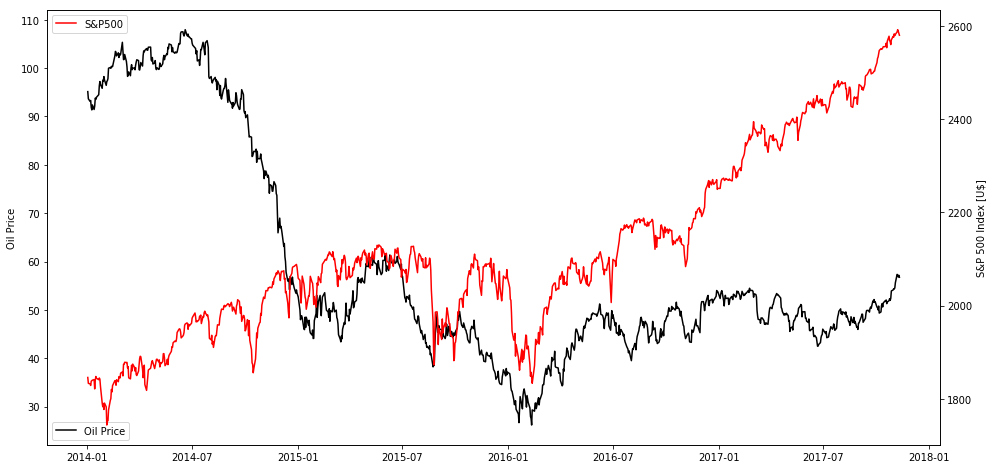

In [73]:
plt.figure(figsize=(16,8))
ax1 = plt.subplot(1,1,1)
f=plt.plot(oil_price.Price, 'k', label="Oil Price")
plt.legend(loc=3)
plt.ylabel("Oil Price")

ax2 = ax1.twinx()
plt.plot(sp500["Open"], 'r', label="S&P500")
plt.ylabel("S&P 500 Index [U$]")
plt.legend(loc="best")
plt.plot()
figsize=(16, 8)



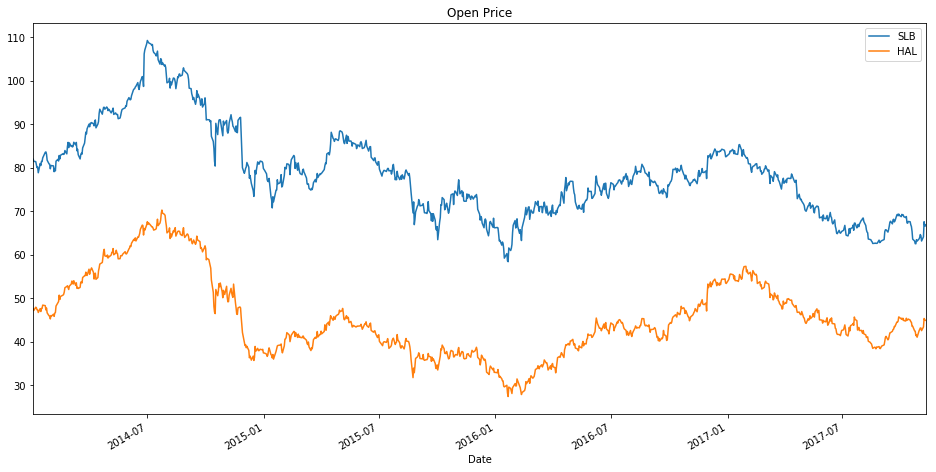

In [58]:
slb = allStocks[allStocks['name'] == 'SLB']
hal = allStocks[allStocks['name'] == 'HAL']
slb['Open'].plot(label='SLB', figsize=(16, 8), title='Open Price')
hal['Open'].plot(label='HAL')
plt.legend()